<a href="https://colab.research.google.com/github/comandi1969/AIFFEL_Online_Quest/blob/main/DL_Master/%EB%94%A5%EB%9F%AC%EB%8B%9D_%EC%8B%9C%EC%9E%91_CV%E2%80%8B02_%EC%86%90%EA%B8%80%EC%94%A8_%EC%BC%80%EB%9D%BC%EC%8A%A4_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import sys
import tensorflow as tf
import numpy as np

In [21]:
# MNIST 데이터셋 불러오기
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()

# shape 확인하기
print(X_train.shape) # 28 x 28의 이미지가 60,000장
print(Y_train.shape) ## [ 5, 1, 2, 3, 4, 4,   .... ]
print("학습셋 이미지 수 : %d 개" % (X_train.shape[0]))
print("테스트셋 이미지 수 : %d 개" % (X_test.shape[0]))

(60000, 28, 28)
(60000,)
학습셋 이미지 수 : 60000 개
테스트셋 이미지 수 : 10000 개


5


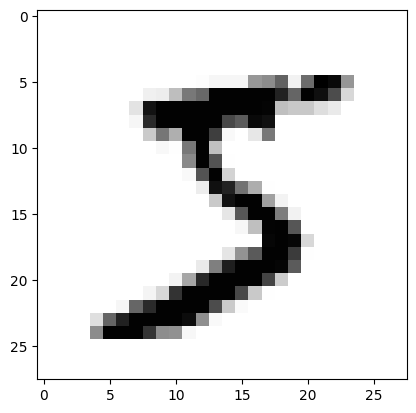

In [22]:
# MNIST 데이터를 시각화하기
import matplotlib.pyplot as plt

print(Y_train[0]) # 첫 번째 레이블 값 출력

plt.imshow(X_train[0], cmap='Greys') # 첫 번째 입력 데이터 흑백 이미지 출력
plt.show()

In [23]:
# 데이터를 직접 들여다보기
print(X_train.shape)
for x in X_train[0]:
    # print(x)
    # break
    for i in x:
        sys.stdout.write('%d\t' % i)
    sys.stdout.write('\n')

(60000, 28, 28)
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	3	18	18	18	126	136	175	26	166	255	247	127	0	0	0	0	
0	0	0	0	0	0	0	0	30	36	94	154	170	253	253	253	253	253	225	172	253	242	195	64	0	0	0	0	
0	0	0	0	0	0	0	49	238	253	253	253	253	253	253	253	253	251	93	82	82	56	39	0	0	0	0	0	
0	0	0	0	0	0	0	18	219	253	253	253	253	253	198	182	247	241	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	80	156	107	253	253	205	11	0	43	154	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	14	1	154	253	90	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	139	253	190	2	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	11	190	253	70	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	35	241	225	160	108	1	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	81	240	253	253	119	25	0	0

In [24]:
# MLP 구조에 적절한 input의 형태로 변형하기
## reshape()을 사용하여 2차원의 데이터를 1차원으로 변형
## 1차원으로 변형함과 동시에 Normalization
X_train = X_train.reshape(-1, 784).astype('float32') # 28 x 28= 784
X_test = X_test.reshape(-1, 784).astype('float32')

In [25]:
# Q. reshape한 X_train과 X_test의 shape을 다시 확인해 보세요.
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [26]:
# Label 값을 One-hot encoding 하기
# Multi-Class Classfication이므로 keras.utils.to_categorical을 사용
Y_train = tf.keras.utils.to_categorical(Y_train)
Y_test = tf.keras.utils.to_categorical(Y_test)

In [27]:
print(Y_train.shape)
print(Y_test.shape)
print(Y_train[0])

(60000, 10)
(10000, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_6 (Dense)             (None, 512)               401920    
                                                                 
 dense_7 (Dense)             (None, 512)               262656    
                                                                 
 dense_8 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


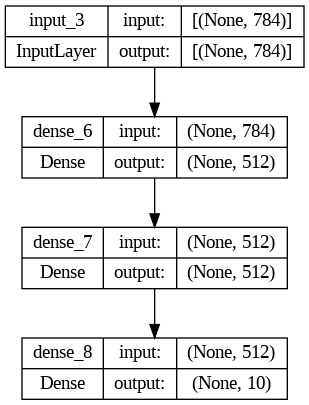

In [28]:
from tensorflow.keras import utils

# 모델 설계하기
input_layer = tf.keras.layers.Input(shape=(784,)) # input layer, input의 사이즈에 맞게 shape을 지정하는 것이 중요
x = tf.keras.layers.Dense(512, activation='relu')(input_layer) # hidden layer 1, 512개의 perceptron으로 구성된 fully connted layer, activation 함수는 relu
x = tf.keras.layers.Dense(512, activation='relu')(x) # hidden layer 2

# 분류해야 하는 class 0~9 (10개) -> 따라서 최종 layer의 perceptron은 10개
out_layer= tf.keras.layers.Dense(10, activation='softmax')(x)

model = tf.keras.Model(inputs=[input_layer], outputs=[out_layer])
model.summary()
utils.plot_model(model, show_shapes=True)

In [30]:
loss=tf.keras.losses.categorical_crossentropy
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
metric=tf.keras.metrics.categorical_accuracy
model.compile(loss = loss,
              optimizer = optimizer,
              metrics = [metric])

In [31]:
# validation_data 옵션으로 테스트 데이터만 넣어주어서 검증 데이터 분류가 가능
history = model.fit(X_train, Y_train, validation_split=0.2, epochs=30, batch_size=1000, verbose=2)
print(history.history.keys())

Epoch 1/30
48/48 - 3s - loss: 15.5682 - categorical_accuracy: 0.7725 - val_loss: 1.1844 - val_categorical_accuracy: 0.9130 - 3s/epoch - 69ms/step
Epoch 2/30
48/48 - 3s - loss: 0.7856 - categorical_accuracy: 0.9229 - val_loss: 0.7188 - val_categorical_accuracy: 0.9265 - 3s/epoch - 54ms/step
Epoch 3/30
48/48 - 3s - loss: 0.3803 - categorical_accuracy: 0.9491 - val_loss: 0.5930 - val_categorical_accuracy: 0.9356 - 3s/epoch - 63ms/step
Epoch 4/30
48/48 - 2s - loss: 0.2016 - categorical_accuracy: 0.9671 - val_loss: 0.5318 - val_categorical_accuracy: 0.9414 - 2s/epoch - 52ms/step
Epoch 5/30
48/48 - 3s - loss: 0.1069 - categorical_accuracy: 0.9786 - val_loss: 0.4950 - val_categorical_accuracy: 0.9435 - 3s/epoch - 53ms/step
Epoch 6/30
48/48 - 3s - loss: 0.0592 - categorical_accuracy: 0.9865 - val_loss: 0.4924 - val_categorical_accuracy: 0.9435 - 3s/epoch - 53ms/step
Epoch 7/30
48/48 - 4s - loss: 0.0300 - categorical_accuracy: 0.9927 - val_loss: 0.4732 - val_categorical_accuracy: 0.9460 - 4s/ep

In [32]:
# Training loss 확인하기
loss = history.history['loss']
print(loss)

[15.56823444366455, 0.7855531573295593, 0.3802945017814636, 0.20159810781478882, 0.10690407454967499, 0.05922491475939751, 0.030020492151379585, 0.016326917335391045, 0.007961670868098736, 0.0037091237027198076, 0.0020255299750715494, 0.0011658701114356518, 0.000854432350024581, 0.0006281724781729281, 0.0005395554471760988, 0.00047502925735898316, 0.00043033724068664014, 0.00039196369471028447, 0.00035959447268396616, 0.0003333776840008795, 0.0003092805272899568, 0.0002881874970626086, 0.00027052866062149405, 0.00025254004867747426, 0.00023704317572992295, 0.00022418588923756033, 0.00021262462541926652, 0.00020068406593054533, 0.00018983618065249175, 0.00018036685651168227]


In [33]:
# Q. Validation loss를 확인해 보세요.
val_loss = history.history['val_loss']
print(val_loss)

[1.1843852996826172, 0.7188348174095154, 0.5929795503616333, 0.5318217873573303, 0.49500715732574463, 0.4923563599586487, 0.4732324182987213, 0.4658840000629425, 0.46305614709854126, 0.4614758789539337, 0.4611898958683014, 0.4576452970504761, 0.45789819955825806, 0.45729830861091614, 0.4564591944217682, 0.45681560039520264, 0.4564093351364136, 0.4557589590549469, 0.45600560307502747, 0.45579954981803894, 0.45576122403144836, 0.4554424285888672, 0.455331414937973, 0.4550858438014984, 0.4551332890987396, 0.45481163263320923, 0.45513683557510376, 0.45519983768463135, 0.4547078013420105, 0.4548274278640747]


In [34]:
# Test 데이터를 통해서 정확도 확인하기
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

313/313 [==============================] - 1s 2ms/step - loss: 0.4061 - categorical_accuracy: 0.9523

 Test Accuracy: 0.9523


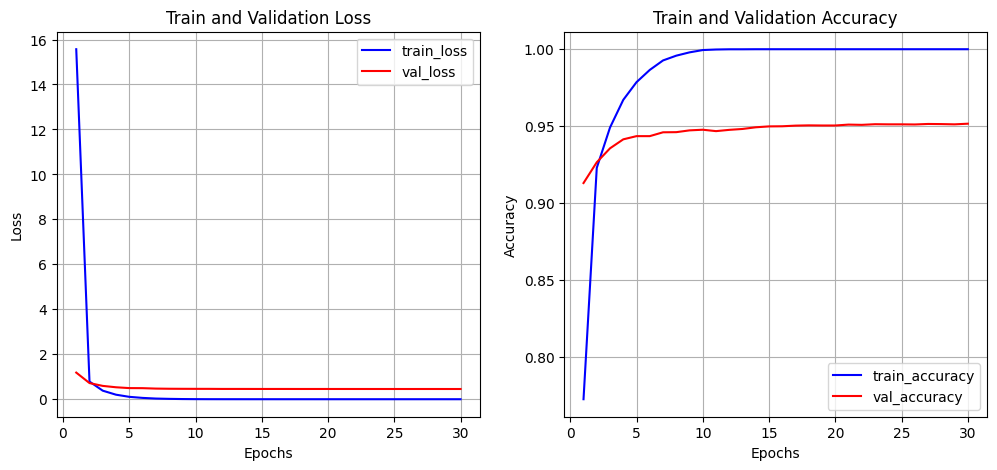

In [35]:
# 도식화 표현
def show_history(history):
    history_dict = history.history

    loss = history_dict['loss']
    val_loss = history_dict['val_loss']

    epochs = range(1, len(loss) + 1)
    fig = plt.figure(figsize=(12, 5))

    ax1 = fig.add_subplot(1, 2, 1)
    ax1.plot(epochs, loss, 'b-', label='train_loss')
    ax1.plot(epochs, val_loss, 'r-', label='val_loss')
    ax1.set_title('Train and Validation Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.grid()
    ax1.legend()

    accuracy = history_dict['categorical_accuracy']
    val_accuracy = history_dict['val_categorical_accuracy']

    ax2 = fig.add_subplot(1, 2, 2)
    ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
    ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
    ax2.set_title('Train and Validation Accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.grid()
    ax2.legend()

    plt.show()

import matplotlib.pyplot as plt
import numpy as np
show_history(history)

Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 784)]             0         
                                                                 
 dense_36 (Dense)            (None, 512)               401920    
                                                                 
 batch_normalization_18 (Bat  (None, 512)              2048      
 chNormalization)                                                
                                                                 
 activation_18 (Activation)  (None, 512)               0         
                                                                 
 dense_37 (Dense)            (None, 512)               262656    
                                                                 
 batch_normalization_19 (Bat  (None, 512)              2048      
 chNormalization)                                         

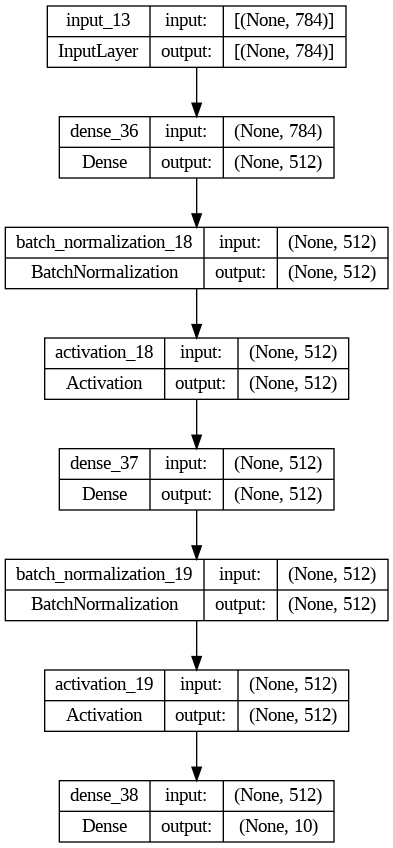

In [76]:
# 모델 설계
from tensorflow.keras import utils
from tensorflow.keras.layers import BatchNormalization

he_normal_init = tf.keras.initializers.he_normal()

input_layer = tf.keras.layers.Input(shape=(784,))
tf.keras.initializers.he_normal()
x = tf.keras.layers.Dense(512, kernel_initializer=he_normal_init)(input_layer)
x = BatchNormalization()(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.Dense(512, kernel_initializer=he_normal_init)(x)
x = BatchNormalization()(x)
x = tf.keras.layers.Activation('relu')(x)
out_layer = tf.keras.layers.Dense(10, activation='softmax')(x)

model = tf.keras.Model(inputs=[input_layer], outputs=[out_layer])
model.summary()
utils.plot_model(model, show_shapes=True)

In [77]:
#  loss 함수, optimizer, metric 설정 & 모델 compile
loss=tf.keras.losses.categorical_crossentropy
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
metric=tf.keras.metrics.categorical_accuracy
model.compile(loss = loss,
              optimizer = optimizer,
              metrics = [metric])



In [78]:
# Training
history = model.fit(X_train, Y_train, validation_split=0.2, epochs=30, batch_size=512, verbose=2)
print(history.history.keys())

Epoch 1/30
47/47 - 4s - loss: 0.3795 - categorical_accuracy: 0.8828 - val_loss: 0.1953 - val_categorical_accuracy: 0.9453 - 4s/epoch - 96ms/step
Epoch 2/30
47/47 - 3s - loss: 0.1116 - categorical_accuracy: 0.9690 - val_loss: 0.1169 - val_categorical_accuracy: 0.9661 - 3s/epoch - 60ms/step
Epoch 3/30
47/47 - 3s - loss: 0.0678 - categorical_accuracy: 0.9829 - val_loss: 0.1220 - val_categorical_accuracy: 0.9650 - 3s/epoch - 70ms/step
Epoch 4/30
47/47 - 3s - loss: 0.0424 - categorical_accuracy: 0.9911 - val_loss: 0.1115 - val_categorical_accuracy: 0.9683 - 3s/epoch - 60ms/step
Epoch 5/30
47/47 - 3s - loss: 0.0273 - categorical_accuracy: 0.9954 - val_loss: 0.0933 - val_categorical_accuracy: 0.9728 - 3s/epoch - 74ms/step
Epoch 6/30
47/47 - 3s - loss: 0.0172 - categorical_accuracy: 0.9977 - val_loss: 0.0982 - val_categorical_accuracy: 0.9706 - 3s/epoch - 62ms/step
Epoch 7/30
47/47 - 3s - loss: 0.0112 - categorical_accuracy: 0.9991 - val_loss: 0.0923 - val_categorical_accuracy: 0.9727 - 3s/epo

In [79]:
# 성능 확인
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

313/313 [==============================] - 1s 2ms/step - loss: 0.0680 - categorical_accuracy: 0.9822

 Test Accuracy: 0.9822


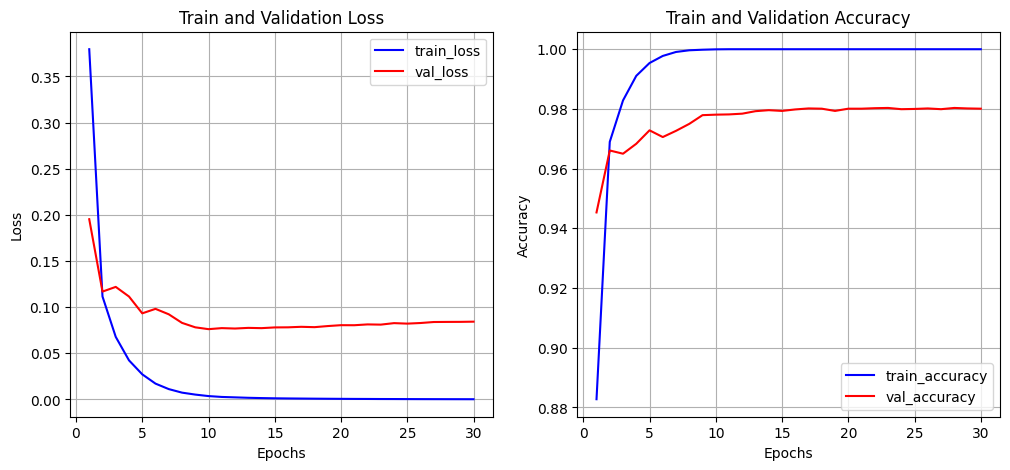

In [80]:
# 도식화 표현
def show_history(history):
    history_dict = history.history

    loss = history_dict['loss']
    val_loss = history_dict['val_loss']

    epochs = range(1, len(loss) + 1)
    fig = plt.figure(figsize=(12, 5))

    ax1 = fig.add_subplot(1, 2, 1)
    ax1.plot(epochs, loss, 'b-', label='train_loss')
    ax1.plot(epochs, val_loss, 'r-', label='val_loss')
    ax1.set_title('Train and Validation Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.grid()
    ax1.legend()

    accuracy = history_dict['categorical_accuracy']
    val_accuracy = history_dict['val_categorical_accuracy']

    ax2 = fig.add_subplot(1, 2, 2)
    ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
    ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
    ax2.set_title('Train and Validation Accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.grid()
    ax2.legend()

    plt.show()

import matplotlib.pyplot as plt
import numpy as np
show_history(history)